In [87]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFB16691D0>,
      dtype=object)

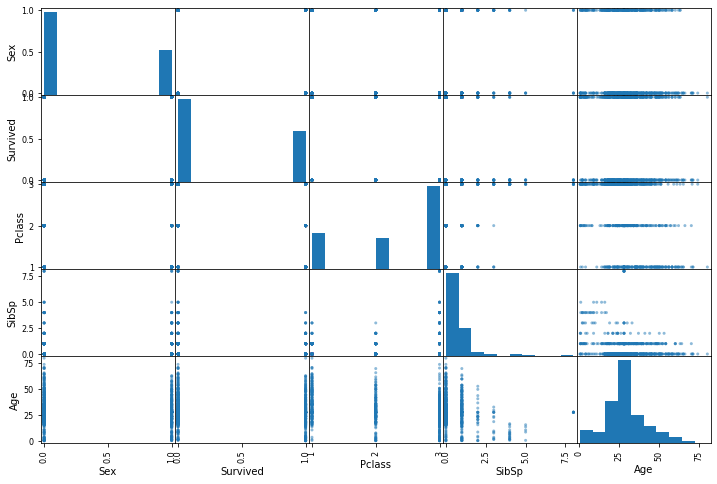

In [88]:
# pandas의 scatter_matrix 함수를 이용한 상관관계 조사
from pandas.plotting import scatter_matrix

attributes = ["Sex", "Survived", "Pclass", "SibSp", "Age"]

scatter_matrix(train_tr[attributes], figsize=(12, 8))

In [89]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


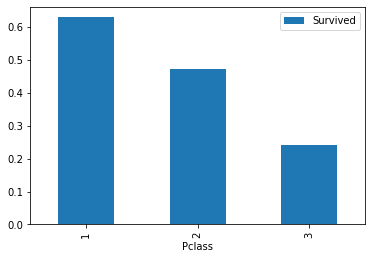

In [90]:
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [91]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [92]:
train[train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


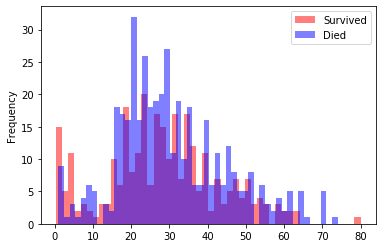

In [93]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5, color="red", bins=50)
died["Age"].plot.hist(alpha=0.5, color="blue", bins=50)
plt.legend(["Survived", "Died"])
plt.show()

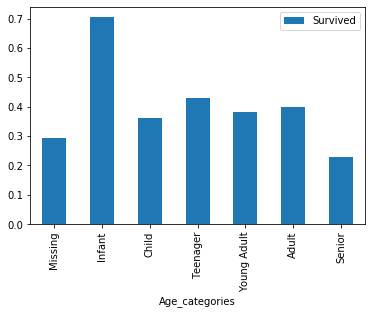

In [94]:
def process_age(df, cut_points, labels_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df

# -1 ~ 0까지는 Missing, 0 ~ 5는 Infant, 5 ~ 12는 Child, ... 60 ~ 100까지는 Senior로 맵핑
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

age_cat_pivot = train.pivot_table(index="Age_categories", values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [95]:
# 3가지 예측 가능 -> Sex, Pclass, Age
# 텍스트형을 수치형으로 변경해야 머신러닝 작동 가능

train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [96]:
# 각 승객의 클래스는 분명히 어떤 종류의 순서 관계를 가지고 있지만, 
# 각 클래스 간의 관계는 숫자 1, 2 및 3의 관계와 동일하지 않음. 
# 1은 클래스 3이 클래스 1의 "가치" 3배가 x
# 이 관계를 제거하기 위해 Pclass에서 각 고유 값에 대해 더미 열을 작성할 수 있음.
# pandas의 get_dummies를 사용
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name], prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [97]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

train = create_dummies(train, "Pclass")
test = create_dummies(test, "Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [98]:
train = create_dummies(train, "Sex")
test = create_dummies(test, "Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(test, "Age_categories")

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Cabin                         204 non-null object
Embarked                      889 non-null object
Age_categories                891 non-null category
Pclass_1                      891 non-null uint8
Pclass_2                      891 non-null uint8
Pclass_3                      891 non-null uint8
Sex_female                    891 non-null uint8
Sex_male                      891 non-null uint8
A

In [100]:
# creating first machine learning model
 
# Logistic Regression
"""
    The scikit-learn workflow consists of four main steps:

    1. Instantiate (or create) the specific machine learning model you want to use
    2. Fit the model to the training data
    3. Use the model to make predictions
    4. Evaluate the accuracy of the predictions
    5. Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of.
"""

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# X: 학습시키려는 2차원 배열 모델, y: 예측하려는 1차원 배열 특성
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
lr.fit(train[columns], train["Survived"])

lr.decision_function(train[columns])

array([-2.17461956,  2.00035176,  0.42472782,  2.58168075, -2.17461956,
       -2.38706091, -0.59899563, -0.70208858,  0.42472782,  1.37114073,
        1.8972588 ,  2.00035176, -2.17461956, -2.75594855,  0.29063705,
        0.9239025 , -0.70208858, -1.30655724,  0.42472782,  0.21228647,
       -1.09411589, -1.09411589,  0.29063705, -0.01766663,  0.35717802,
       -0.15660117, -2.38706091, -0.01766663,  0.21228647, -2.38706091,
       -0.59899563,  2.3692394 ,  0.21228647, -2.03912834, -0.01766663,
       -0.59899563, -2.38706091, -2.17461956,  0.29063705,  0.29063705,
       -0.15660117,  1.50523149, -2.38706091,  2.97776247,  0.42472782,
       -2.38706091, -2.38706091,  0.21228647, -2.38706091,  0.29063705,
       -2.24216936, -2.17461956,  2.00035176,  1.50523149, -0.96267908,
       -0.23010798,  1.50523149, -2.17461956,  2.97776247, -2.24216936,
       -2.17461956,  2.00035176, -0.59899563, -0.70208858, -0.23010798,
       -2.38706091,  1.50523149, -2.17461956,  0.29063705, -2.17

In [102]:
# Spliting our training Data
# One part to train our model on (often 80% of the observations)
# One part to make predictions with and test our model (often 20% of the observations)

holdout = test # 이전까지의 test 데이터는 최종 마지막 검증을 위한 테스트 데이터

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train["Survived"]

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

train_X.shape

(712, 12)

In [105]:
train_y

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [109]:
# 예측과 정확도 측정
# 사이킷런에서 정확도 측정 기능 -> metrics.accuracy_score(), 각 실제 값과 예측 값 대입
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y) # train_X: 예측 모델, train_y: 예측 특성('Survived')
predictions = lr.predict(test_X) # 테스트 데이터에 넣어 예측해보기
accuracy = accuracy_score(test_y, predictions)

accuracy

0.8100558659217877

In [126]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=["Survived", "Died"])
index = [["Survived", "Died"]]

display(pd.DataFrame(conf_matrix, columns=["Survived", "Died"]))

,Survived,Died
0,96,14
1,20,49


In [143]:
# 모델의 성능을 높이기 위해 -> 교차 검증 -> k-fold 교차 검증
# fold는 모델을 훈련시키는 각기 다른 반복, k는 횟수
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

#     cv: 2  -> 0.7800120925076838
#     cv: 3  -> 0.7845117845117845
#     cv: 4  -> 0.7890053730860905
#     cv: 5  -> 0.7890276818780994
#     cv: 6  -> 0.7912131930588306
#     cv: 7  -> 0.7980262232845894
#     cv: 8  -> 0.7990769787644788
#     cv: 9  -> 0.7968574635241301
#     cv: 10 -> 0.8024719101123596 이후 부터는 비슷함

0.8024719101123596

In [144]:
# 보이지 않는 데이터 예측하기(hold out 테스트 검증하기)
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,0,0,0,1,0,0


In [145]:
lr = LogisticRegression()
lr.fit(all_X, all_y)

holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
# holdout_predictions와 holdout 데이터 프레임의 passengerid 열이 포함된 새 데이터 프레임
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("titanic_submission.csv", index=False)